In [1]:
import autograd.numpy as np 
import matplotlib.pyplot as plt

from typing import Callable

In [2]:
def plot_func(func, bounds, label='f(x)', show=True, fname=None):
    a, b = bounds
    x_list = np.linspace(a, b, 200)
    y_list = func(x_list)

    plt.plot(x_list, y_list, c='red', label=label)
    plt.grid(True)
    
    if fname is not None:
        plt.savefig(fname=fname, format='png')
        
    if show:
        plt.legend()
        plt.show()

### **Задача 9.1.10**

In [3]:
def newton_optimize(
    func: Callable[float, float],
    func_der1: Callable[float, float],
    func_der2: Callable[float, float],
    x0: float,
    eps: float = 1e-6, 
    max_iter: int = 2500) -> tuple[float, int]:
    """
    Finds the extremum of a function using Newton method.
    """
    if np.isclose(func_der2(x0), 0.0):
        raise ValueError("f''(x0) = 0.0")

    x1 = x0 - func_der1(x0)/func_der2(x0)
    n_iter = 1

    while np.abs(x1 - x0) > eps and n_iter < max_iter:
        x0 = x1
        x1 -= func_der1(x1) / func_der2(x1)
        n_iter += 1

    return x1, n_iter

In [4]:
def f(x):
    return np.exp(x) * np.cos(x)

def f_der1(x):
    return np.exp(x) * (np.cos(x) - np.sin(x))

def f_der2(x):
    return -2 * np.exp(x) * np.sin(x)

a = 0
b = 1.5

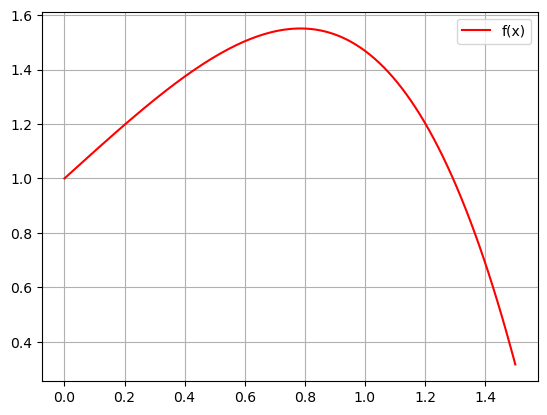

In [5]:
plot_func(f, (a, b), fname='plots/task1_plot.png')

In [6]:
x_max, n_iter = newton_optimize(
    f, f_der1, f_der2, (a + b) / 2
)

print(f"iterations: {n_iter}")
print(f"x_max: {x_max:.6f}")
print(f"f(x_max): {f(x_max):.6f}")
print(f"f''(x_max): {f_der2(x_max):.6f}")

iterations: 4
x_max: 0.785398
f(x_max): 1.550883
f''(x_max): -3.101766


In [7]:
x_min = a if f(a) < f(b) else b

print(f"a: {a:.6f}")
print(f"f(a): {f(a):.6f}")
print()
print(f"b: {b:.6f}")
print(f"f(b): {f(b):.6f}")
print()
print(f"x_min: {x_min:.6f}")

a: 0.000000
f(a): 1.000000

b: 1.500000
f(b): 0.317022

x_min: 1.500000


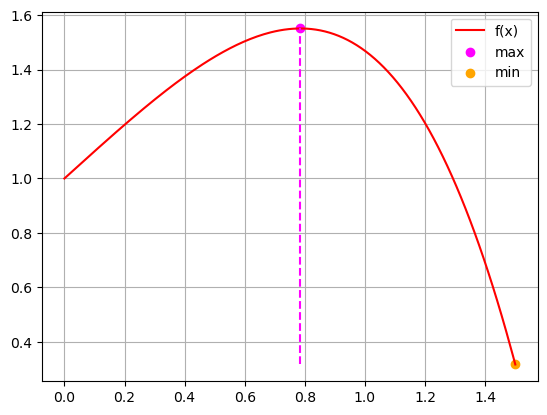

In [8]:
plot_func(f, (a, b), show=False)
plt.scatter([x_max], [f(x_max)], c='magenta', label='max')
plt.vlines(x_max, ymin=f(x_min), ymax=f(x_max), ls='--', colors='magenta')
plt.scatter([x_min], [f(x_min)], c='orange', label='min')

plt.legend()
plt.savefig(fname="plots/task1_opt.png", format='png')
plt.show()

### **Задача 9.2.4**

Метод: золотого сечения

In [9]:
def f(t):
    return (t ** 2 - t - 1) / (t ** 2 + t + 5)

a, b = -1, 2

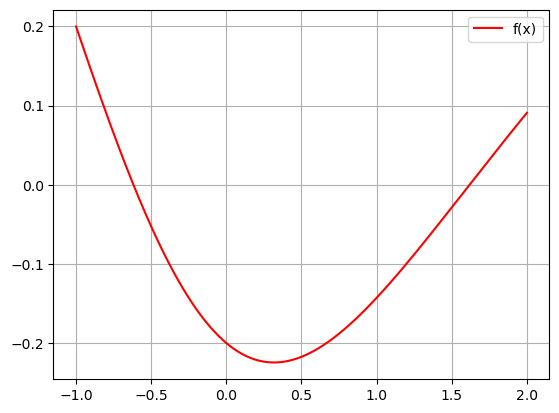

In [10]:
plot_func(f, (a, b), fname="plots/task2_plot.png")

In [11]:
from scipy.constants import golden_ratio


def golden_search(func, bounds, eps=1e-6):
    """
    Finds minimum of unimodal function on the 
    specified segment using golden search method.
    """
    a, b = bounds
    tau = golden_ratio
    n_iter = 0

    while np.abs(a - b) > eps:
        x1 = b - (b - a) / tau
        x2 = a + (b - a) / tau

        y1 = func(x1)
        y2 = func(x2)

        if y1 >= y2:
            a = x1
        else:
            b = x2

        n_iter += 1

    return (a + b) / 2, n_iter

In [12]:
x_min, n_iter = golden_search(f, (a, b))

print(f"iterations: {n_iter}")
print(f"x_min: {x_min:.6f}")
print(f"f(x_min): {f(x_min):.6f}")

iterations: 31
x_min: 0.316625
f(x_min): -0.224553


In [13]:
x_max = a if f(a) > f(b) else b

print(f"a: {a:.6f}")
print(f"f(a): {f(a):.6f}")
print()
print(f"b: {b:.6f}")
print(f"f(b): {f(b):.6f}")
print()
print(f"x_max: {x_max:.6f}")

a: -1.000000
f(a): 0.200000

b: 2.000000
f(b): 0.090909

x_max: -1.000000


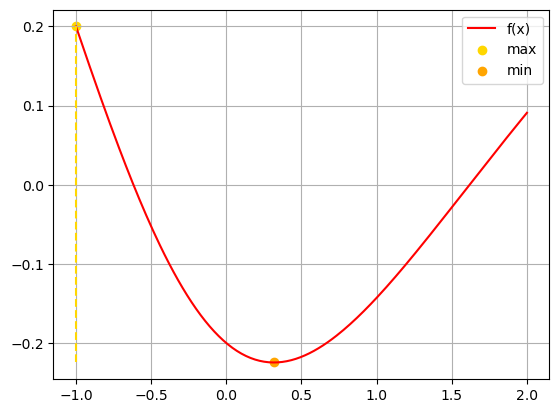

In [14]:
plot_func(f, (a, b), show=False)
plt.scatter([x_max], [f(x_max)], c='gold', label='max')
plt.vlines(x_max, ymin=f(x_min), ymax=f(x_max), ls='--', colors='gold')
plt.scatter([x_min], [f(x_min)], c='orange', label='min')

plt.legend()
plt.savefig(fname="plots/task2_opt.png", format='png')
plt.show()

### **Задача 9.5.10**

In [15]:
def f(x, y):
    return x ** 2 + y ** 2 + x + np.exp(-y)

x0, x1 = -2, 1
y0, y1 = -2, 1

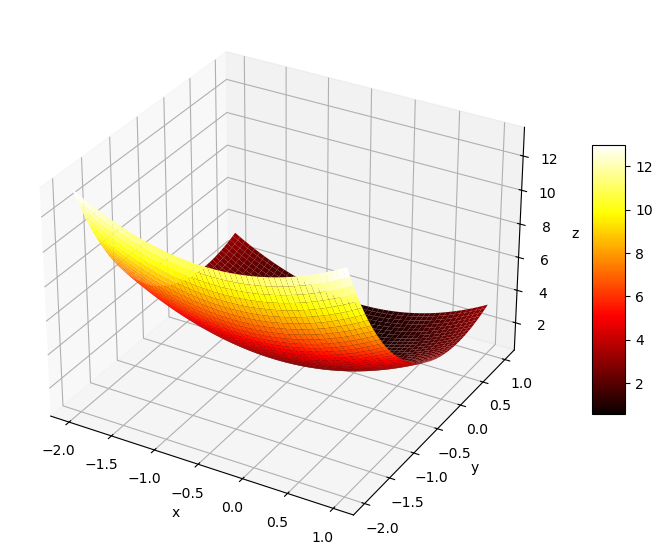

In [16]:
# Data
x_arr = np.linspace(x0, x1, 250, endpoint=True)
y_arr = np.linspace(y0, y1, 250, endpoint=True)

xs, ys = np.meshgrid(x_arr, y_arr)
zs = f(xs, ys)

# Plot
fig = plt.figure(figsize=(11, 7))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(xs, ys, zs, cmap='hot', label='f(x, y)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=8)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig(fname='plots/task3_surface.png', format='png', bbox_inches='tight')
plt.show()

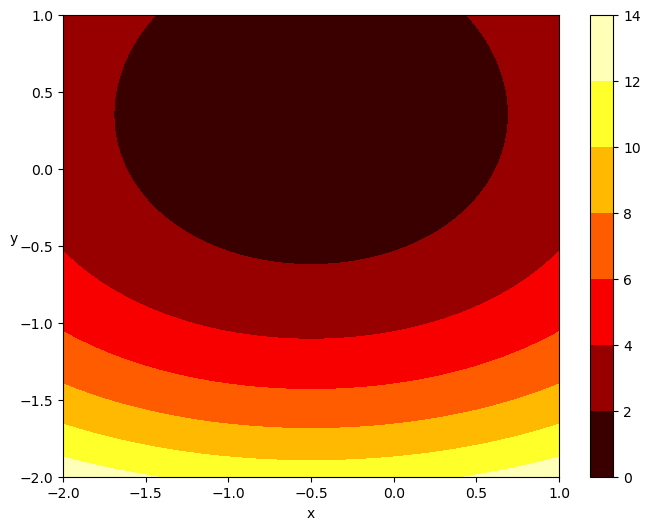

In [17]:
plt.figure(figsize=(8, 6))

plt.contourf(xs, ys, zs, cmap='hot')
plt.colorbar()

plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.savefig(fname='plots/task3_contour.png', format='png', bbox_inches='tight')
plt.show()

Возьмём в качестве начально приближения точку $(x, y) = (-0.5, 0.5)$

In [18]:
from scipy.optimize import minimize


def f_vec(x_arr: np.ndarray):
    return f(x_arr[0], x_arr[1])

In [19]:
x_init = np.array([-0.5, 0.5])
bounds = ((x0, x1), (y0, y1))

opt_res = minimize(f_vec, x0=x_init, tol=1e-6, bounds=bounds)

In [20]:
print("Success:", opt_res.success)
print("Number of iterations:", opt_res.nit)
print("The minimum point:", opt_res.x)
print("The minimum function value:", round(opt_res.fun, 5))

Success: True
Number of iterations: 3
The minimum point: [-0.50000001  0.35173371]
The minimum function value: 0.57718


### **Задача 9.6.10**

метод: наискорейшего спуска


In [199]:
A = np.array([
    [5, -1],
    [-1, 4]
])
b = np.array([0, 9.5])


def f(vec: np.ndarray):
    """
    Returns function value at point (x, y) = vec.
    """
    return 0.5 * (vec @ A @ vec.T) - b @ vec.T


def grad_f(vec: np.ndarray):
    """
    Returns gradient of f(x, y) at point (x, y) = vec.
    """
    return A @ vec.T - b

#### Реализация метода

In [200]:
from autograd import jacobian
from autograd import hessian

In [201]:
def get_der1(func):
    """
    Finds the first derivative of a function of one 
    variable using automatic differentiation tools.
    """
    vec_func = lambda a_arr: func(a_arr[0])
    vec_func_der1 = jacobian(vec_func)
    
    def func_der1(a):
        vec = np.array([a], dtype=float)
        return vec_func_der1(vec)[0]
    return func_der1


def get_der2(func):
    """
    Finds the second derivative of a function of one 
    variable using automatic differentiation tools.
    """
    vec_func = lambda a_arr: func(a_arr[0])
    vec_func_der2 = hessian(vec_func)

    def func_der2(a):
        vec = np.array([a], dtype=float)
        return vec_func_der2(vec)[0, 0]
    return func_der2

In [202]:
def newton_minimize(func, a0, eps=1e-6, max_iter=2500):
    func_der1 = get_der1(func)
    func_der2 = get_der2(func)

    if np.isclose(func_der2(a0), 0.0, rtol=1e-7):
        return a0
    a1 = a0 - func_der1(a0) / func_der2(a0)
    n_iter = 1
    
    while np.abs(a1 - a0) > eps:
        if n_iter == max_iter:
            return a1
        
        if np.isclose(func_der2(a1), 0.0, rtol=1e-7):
            return a1
            
        a0 = a1
        a1 -= func_der1(a1)/func_der2(a1)
        n_iter += 1
    
    return a1

#### Применение метода

In [205]:
def steepest_descent(
    A, x0, y0, opt_mode, eps=1e-6, max_iter=2500):
    """
    Minimizes the quadratic function 
    by the steepest descent method.
    """
    vec0 = np.array([x0, y0])
    g = grad_f(vec0)
    
    if np.isclose(np.linalg.norm(g), 0.0):
        return vec0, 0
    
    vec1 = vec0 - (g @ g.T) / (g @ A @ g.T) * g
    n_iter = 1

    while np.linalg.norm(vec1 - vec0) > eps:
        if n_iter == max_iter:
            error = np.linalg.norm(vec1 - vec0)
            print("Reached the iterations limit.")
            print(f"The error of the solution: {error}")
            print()
            return vec1, n_iter
        
        g = grad_f(vec1)
        vec0 = vec1.copy()
        
        if np.isclose(np.linalg.norm(g), 0.0):
            return vec1, n_iter

        if opt_mode == "analytical":
            alpha = (g @ g.T) / (g @ A @ g.T)
        elif opt_mode == "newton":
            opt_func = lambda a: f(vec1 - a * g)
            alpha = newton_minimize(opt_func, 1.0, 
                                    eps=eps * 0.1)
            
        vec1 -= alpha * g
        n_iter += 1

    return vec1, n_iter

In [206]:
vec_min1, n_iter1 = steepest_descent(A, 0.0, 1.0, opt_mode="analytical")
x_min1, y_min1 = vec_min1

print(f"Iterations: {n_iter1}")
print(f"Minimum point: {np.round(vec_min1, 6)}")
print(f"Function value at vec_min: {f(vec_min1):.6f}")

Iterations: 10
Minimum point: [0.5 2.5]
Function value at vec_min: -11.875000


In [207]:
vec_min2, n_iter2 = steepest_descent(A, 0.0, 1.0, opt_mode="newton")
x_min2, y_min2 = vec_min2

print(f"Iterations: {n_iter2}")
print(f"Minimum point: {np.round(vec_min2, 6)}")
print(f"Function value at vec_min: {f(vec_min2):.6f}")

Reached the iterations limit.
The error of the solution: 2.1819047537659318e-05

Iterations: 2500
Minimum point: [0.500003 2.499984]
Function value at vec_min: -11.875000


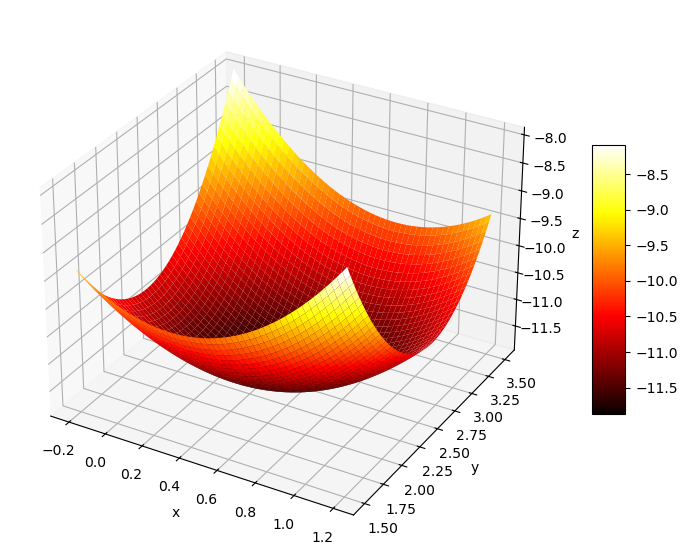

In [208]:
from itertools import product

# Data
x_arr = np.linspace(-0.2, 1.2, 250, endpoint=True)
y_arr = np.linspace(1.5, 3.5, 250, endpoint=True)

xs, ys = np.meshgrid(x_arr, y_arr)
zs = np.zeros((250, 250))
for i, j in product(range(250), range(250)):
    vec = np.array([xs[i, j], ys[i, j]])
    zs[i, j] = f(vec)

# Plot
fig = plt.figure(figsize=(11, 7))
ax = plt.axes(projection='3d')

surf = ax.plot_surface(xs, ys, zs, cmap='hot', label='f(x, y)')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=8)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.savefig(fname='plots/task4_surface.png', format='png', bbox_inches='tight')
plt.show()

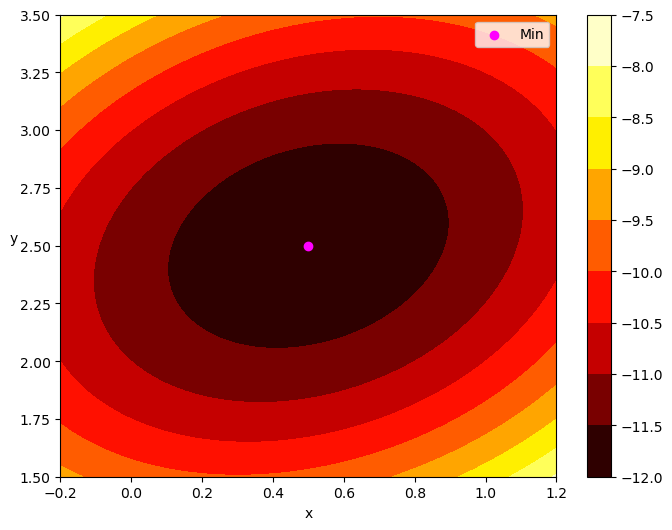

In [209]:
plt.figure(figsize=(8, 6))

plt.contourf(xs, ys, zs, cmap='hot')
plt.colorbar()
plt.scatter([x_min1], [y_min1], c='magenta', label='Min')

plt.xlabel('x')
plt.ylabel('y', rotation=0)

plt.legend()

plt.savefig(fname='plots/task4_contour.png', format='png', bbox_inches='tight')
plt.show()